<a href="https://colab.research.google.com/github/S-Diemel/JBG050/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from google.colab import files


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data Challenge 2/data/burglary_data_city.csv")

Mounted at /content/drive


In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['year month'] = df['year'].astype(str) + '-'+ df['month'].astype(str)

df['year month'] = pd.to_datetime(df['year month'], format='%y-%m').apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df.head()

,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,year month
0,-0.252285,50.834953,12,10,290500.0,33.0,2.0,Adur,2010-12
1,-3.440349,54.698378,12,10,106500.0,34.0,2.5,Allerdale,2010-12
2,-1.388190,53.027519,12,10,157500.0,57.0,2.0,Amber Valley,2010-12
3,-0.635302,50.807425,12,10,265500.0,62.0,2.0,Arun,2010-12
4,-1.256562,53.105927,12,10,126500.0,78.0,2.0,Ashfield,2010-12


In [ ]:
df['city'].unique()

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Barro', 'Basildon', 'Basingstoke and Deane',
       'Bassetlaw', 'Bath and North East Somerset', 'Bedford', 'Bexley',
       'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool',
       'Blaenau Gwent', 'Bolsover', 'Bolton', 'Boston', 'Bournemouth',
       'Bracknell Forest', 'Bradford', 'Braintree', 'Breckland', 'Brent',
       'Brentwood', 'Bridgend', 'Brighton and Hove', 'Bristol',
       'Broadland', 'Bromley', 'Bromsgrove', 'Broxbourne', 'Broxtowe',
       'Burnley', 'Bury', 'Caerphilly', 'Calderdale', 'Cambridge',
       'Camden', 'Cannock Chase', 'Canterbury', 'Cardiff', 'Carlisle',
       'Carmarthenshire', 'Castle Point', 'Central Bedfordshire',
       'Ceredigion', 'Charnwood', 'Chelmsford', 'Cheltenham', 'Cherwell',
       'Cheshire East', 'Cheshire West and Chester', 'Chesterfield',
       'Chichester', '

In [ ]:
city = 'West Oxfordshire'

df_city = df.loc[df['city'] == city]
df_city

,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,year month
327,-1.506846,51.783793,12,10,315250.0,29.0,2.0,West Oxfordshire,2010-12
673,-1.550582,51.788562,1,11,375000.0,40.0,2.0,West Oxfordshire,2011-01
1020,-1.516103,51.826781,2,11,337500.0,27.0,1.0,West Oxfordshire,2011-02
1367,-1.495754,51.793400,3,11,385000.0,43.0,2.0,West Oxfordshire,2011-03
1714,-1.514900,51.790915,4,11,334500.0,32.0,1.5,West Oxfordshire,2011-04
...,...,...,...,...,...,...,...,...,...
43840,-1.479569,51.793599,6,21,353750.0,16.0,1.0,West Oxfordshire,2021-06
44171,-1.541098,51.793760,7,21,357500.0,39.0,2.0,West Oxfordshire,2021-07
44504,-1.490620,51.848264,8,21,360000.0,15.0,1.0,West Oxfordshire,2021-08
44836,-1.487316,51.816310,9,21,392500.0,21.0,1.0,West Oxfordshire,2021-09


In [ ]:
df.head()

,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,year month
0,-0.252285,50.834953,12,10,290500.0,33.0,2.0,Adur,2010-12
1,-3.440349,54.698378,12,10,106500.0,34.0,2.5,Allerdale,2010-12
2,-1.388190,53.027519,12,10,157500.0,57.0,2.0,Amber Valley,2010-12
3,-0.635302,50.807425,12,10,265500.0,62.0,2.0,Arun,2010-12
4,-1.256562,53.105927,12,10,126500.0,78.0,2.0,Ashfield,2010-12


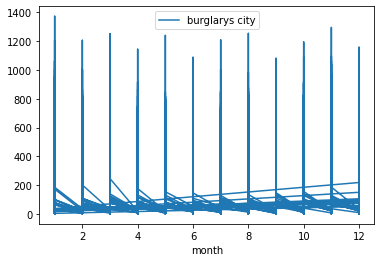

In [ ]:
df[['month','burglarys city']].plot(x='month', y='burglarys city')

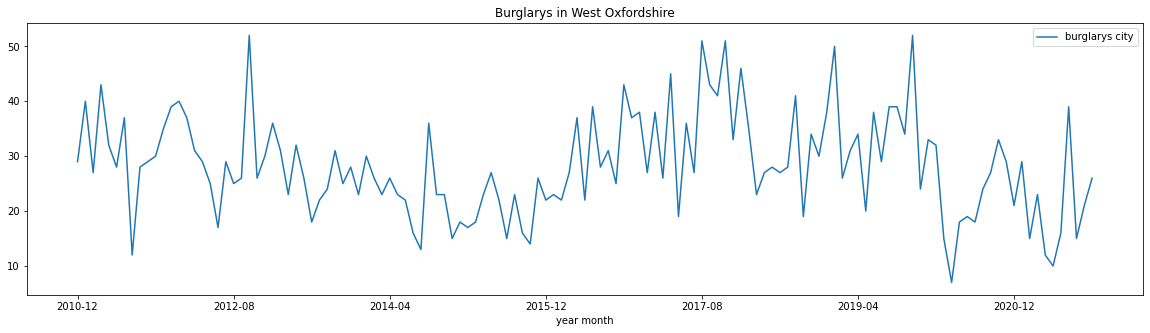

In [ ]:
df_city[['year month', 'burglarys city', 'median house price']].plot(x='year month', y='burglarys city', title='Burglarys in '+ city, figsize=(20,5))

In [ ]:
rolling_mean = df_city['burglarys city'].rolling(window = 12).mean()


In [ ]:
#plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean'')

df_city['rolling_mean'] = rolling_mean

df_city.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,year month,rolling_mean
327,-1.506846,51.783793,12,10,315250.0,29.0,2.0,West Oxfordshire,2010-12,NaN
673,-1.550582,51.788562,1,11,375000.0,40.0,2.0,West Oxfordshire,2011-01,NaN
1020,-1.516103,51.826781,2,11,337500.0,27.0,1.0,West Oxfordshire,2011-02,NaN
1367,-1.495754,51.793400,3,11,385000.0,43.0,2.0,West Oxfordshire,2011-03,NaN
1714,-1.514900,51.790915,4,11,334500.0,32.0,1.5,West Oxfordshire,2011-04,NaN


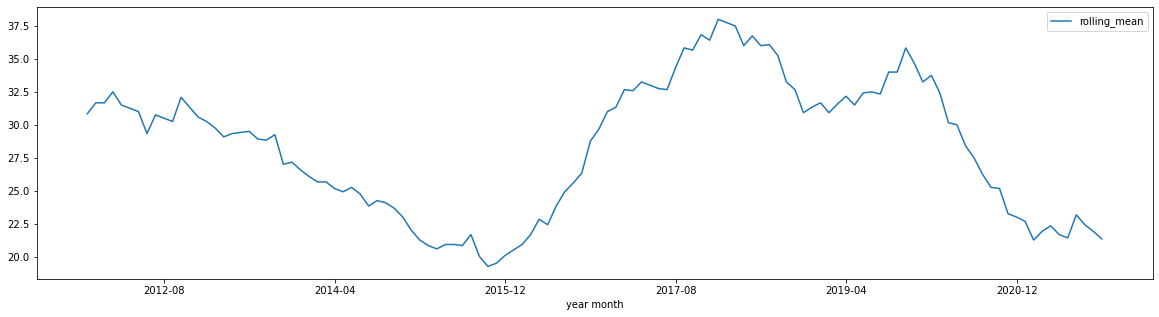

In [ ]:
df_city.plot(x='year month', y='rolling_mean', figsize=(20,5))

In [ ]:
# Reset index to stop expected value error
df_city_index_reset = df_city.reset_index(drop = True)

#Sort it on year/month to perform ARIMA 
df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])
df_city_sorted

#Create test partition
df_city_train = df_city_sorted['2010-12':'2017-12']
df_city_test  = df_city_sorted['2018-01':'2019-12']
print('Train Dataset:',df_city_train.shape)
print('Test Dataset:',df_city_test.shape)

Train Dataset: (85, 10)
Test Dataset: (24, 10)


In [ ]:
# df_city_train = df_city_train[['year month', 'burglarys city']]
# df_city_test = df_city_test[['year month', 'burglarys city']]

In [ ]:
df_city_train['Longitude']

year month
2010-12   -1.506846
2011-01   -1.550582
2011-02   -1.516103
2011-03   -1.495754
2011-04   -1.514900
             ...   
2017-08   -1.544070
2017-09   -1.531649
2017-10   -1.551669
2017-11   -1.546215
2017-12   -1.485403
Name: Longitude, Length: 85, dtype: float64

# Code below not working yet

In [ ]:
# #Import MSE module
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# #Create a history list and prediction list used for the ARIMA function
# history = [x for x in df_city_train]
# predictions = list()

# #Create the ARIMA for-loop
# for t in range(len(df_city_test)):
# 	model = ARIMA(history, order=(4,1,0))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = df_city_test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(df_city_test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

## Attempt 2

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 24.9 MB/s 
     |████████████████████████████████| 9.8 MB 56.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
print('shape of data:', df_city_sorted.shape)
df_city_sorted.head()

shape of data: (131, 10)


,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,year month,rolling_mean
year month,,,,,,,,,,
2010-12,-1.506846,51.783793,12,10,315250.0,29.0,2.0,West Oxfordshire,2010-12,NaN
2011-01,-1.550582,51.788562,1,11,375000.0,40.0,2.0,West Oxfordshire,2011-01,NaN
2011-02,-1.516103,51.826781,2,11,337500.0,27.0,1.0,West Oxfordshire,2011-02,NaN
2011-03,-1.495754,51.793400,3,11,385000.0,43.0,2.0,West Oxfordshire,2011-03,NaN
2011-04,-1.514900,51.790915,4,11,334500.0,32.0,1.5,West Oxfordshire,2011-04,NaN


In [ ]:
df_city_sorted.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09',
       ...
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10'],
      dtype='object', name='year month', length=131)

# Stationarity check




In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('1. ADF: ',dftest[0])
  print('2. P-value: ',dftest[1])
  print('3. Num of Lags: ',dftest[2])
  print('4. Num of observations for ADF REgressiom and Critical Values Calculation :',dftest[3])
  print('5. Critical values: ')
  for key, val in dftest[4].items():
    print('\t',key,':', val)

In [ ]:
ad_test(df_city_sorted['burglarys city'])

1. ADF:  -3.5215489742641117
2. P-value:  0.007450613437173693
3. Num of Lags:  2
4. Num of observations for ADF REgressiom and Critical Values Calculation : 128
5. Critical values: 
	 1% : -3.4825006939887997
	 5% : -2.884397984161377
	 10% : -2.578960197753906


Determine order for ARIMA Model

In [ ]:
#pip uninstall scipy

Found existing installation: scipy 1.2.0
Uninstalling scipy-1.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? n


In [ ]:
pip install scipy==1.2.0

In [ ]:
from platform import python_version

print(python_version())

3.7.12


In [ ]:
scipy.__version__

'1.4.1'

In [ ]:
from pmdarima import auto_arima
# #Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

ImportError: ignored

In [ ]:
stepwise_fit = auto_arima(df_city_sorted['burglarys city'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

NameError: ignored